In [1]:
import numpy as np

data_path = "onoff_"
Is = np.load(data_path + 'I_vals.npy')
Qs = np.load(data_path + 'Q_vals.npy')
raw_data = np.load(data_path + 'raw_data.npy')
labels = np.load(data_path + 'labels.npy')  
print("First 10 labels:", labels[0:10].T)
mask_low = labels == 0
mask_high = labels == 1
Is_low = Is[mask_low]
Qs_low = Qs[mask_low]
raw_data_low = raw_data[mask_low]
labels_low = labels[mask_low]
Is_high = Is[mask_high]
Qs_high = Qs[mask_high]
raw_data_high = raw_data[mask_high]
labels_high = labels[mask_high]
print(f"Is_low shape: {Is_low.shape}, Qs_low shape: {Qs_low.shape}, raw_data_low shape: {raw_data_low.shape}")
print(f"Is_high shape: {Is_high.shape}, Qs_high shape: {Qs_high.shape}, raw_data_high shape: {raw_data_high.shape}")

First 10 labels: [1 1 0 1 0 0 1 1 1 1]
Is_low shape: (500, 24576), Qs_low shape: (500, 24576), raw_data_low shape: (500, 24576)
Is_high shape: (500, 24576), Qs_high shape: (500, 24576), raw_data_high shape: (500, 24576)


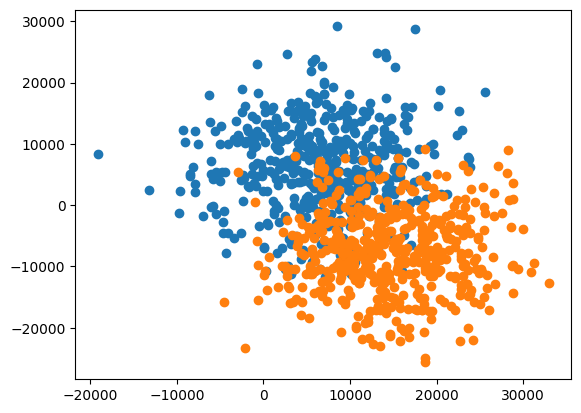

In [126]:
plt.scatter(np.sum(Is_low[:,:], axis=1), np.sum(Qs_low[:,:], axis=1))
plt.scatter(np.sum(Is_high[:,:], axis=1), np.sum(Qs_high[:,:], axis=1))
plt.show()


In [27]:
len(raw_data)

1000

In [91]:
dt = 10*1e-6/len(raw_data[0])

In [95]:
f0

79437575.75757577

79437575.75757577

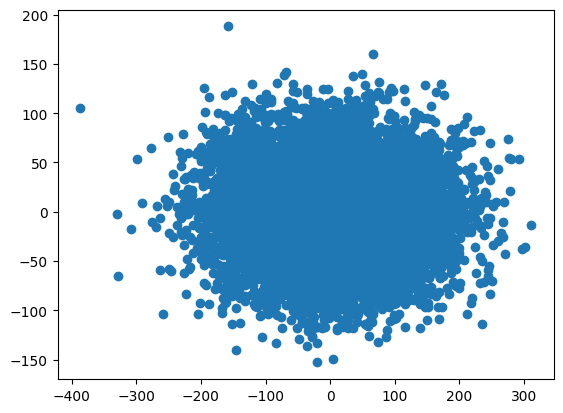

In [140]:
dt = 10*1e-6/len(raw_data[0])
f0 = 80.5 * 1e6
Fs = 1/dt # Hz, replace with actual sampling rate if available
N = len(raw_data[0])
t = np.arange(N) / Fs

# Demodulate
phis = np.linspace(0, 2*np.pi, 101)
losses = []
for phi in phis:
    demod_cos = raw_data[0] * np.cos(2*np.pi*f0 * t + phi)
    loss = np.sum(np.abs(demod_cos - Is[0]))
    losses.append(loss)

phi0 = phis[np.argmin(losses)]

Idigital = raw_data[0]*np.cos(2*np.pi*f0*t + phi0) 

plt.scatter(Idigital, Is[0])








In [135]:
phi0 = phis[np.argmin(losses)]

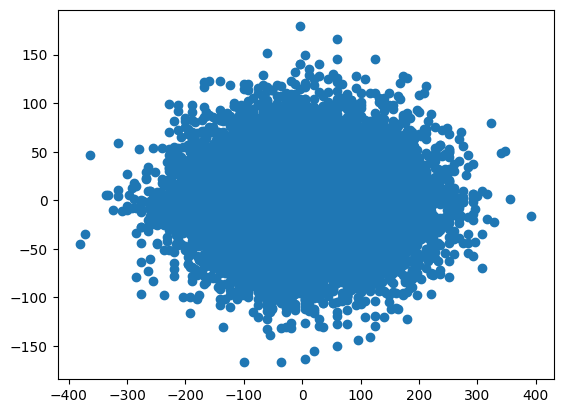

In [138]:
plt.scatter(raw_data[0], Qs[0])

(0.0, 100.0)

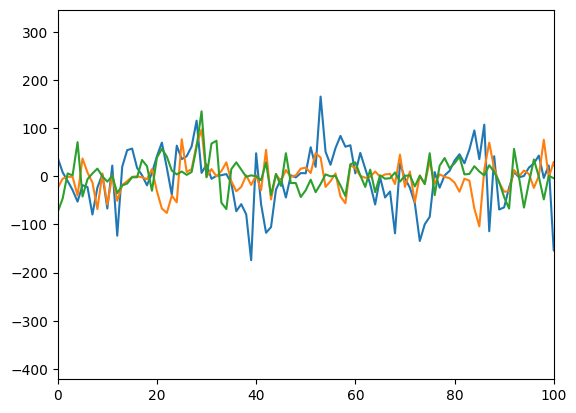

In [136]:
plt.plot(raw_data[0]*np.sin(2*np.pi*f0*t + phi0) )

plt.plot(Is[0])
plt.plot(Qs[0])


plt.xlim(0,100)

In [ ]:
plt.plot()

Maximum frequency in Savg: 0.03232323232323232 Hz


/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_46146/4200357227.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.semilogy(f, 3*1e0/f**0.3)


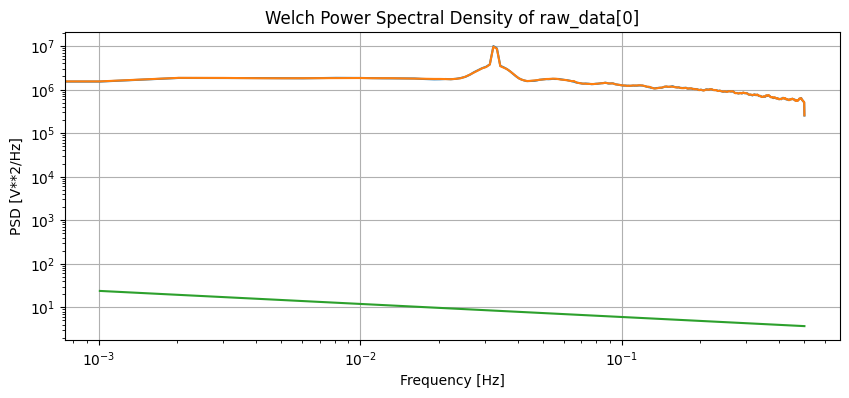

In [ ]:
plt.figure(figsize=(10, 4))
plt.semilogy(f, Savg[0,:])
plt.semilogy(f, Savg[1,:])
plt.semilogy(f, 3*1e0/f**0.3    )
plt.title("Welch Power Spectral Density of raw_data[0]")
plt.xlabel("Frequency [Hz]")
max_freq = f[np.argmax(Savg)]
print(f"Maximum frequency in Savg: {max_freq} Hz")
plt.ylabel("PSD [V**2/Hz]")
plt.grid(True)
plt.xscale("log")
plt.show()

In [76]:
32.323232 * 1e6

32323231.999999996